RFM (recency, frequency, monetary) analysis? RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

Data Preparation

Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

Opening File As df ( Data Frame)

In [2]:
#__________________
# read the datafile
df = pd.read_csv('/content/data.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})
print('Dataframe dimensions:', df.shape)
#______
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#____________________________________________________________
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)
#__________________
# show first lines
display(df[:5])

Dataframe dimensions: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


About 25% of the entries are not assigned to a particular customer

In [3]:
#df= pd.read_csv('/content/data.csv')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

Dataframe dimensions: (406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,object,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dataframe dimensions: (406829, 8) with No Null Values

Checking For Duplicate Enteries and Removing Them

In [7]:
print('No of Duplicate Enteries are: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

No of Duplicate Enteries are: 5225


Univariate Analysis

1. Countries

In [74]:
df['Country'].describe()

count             401604
unique                37
top       United Kingdom
freq              356728
Name: Country, dtype: object

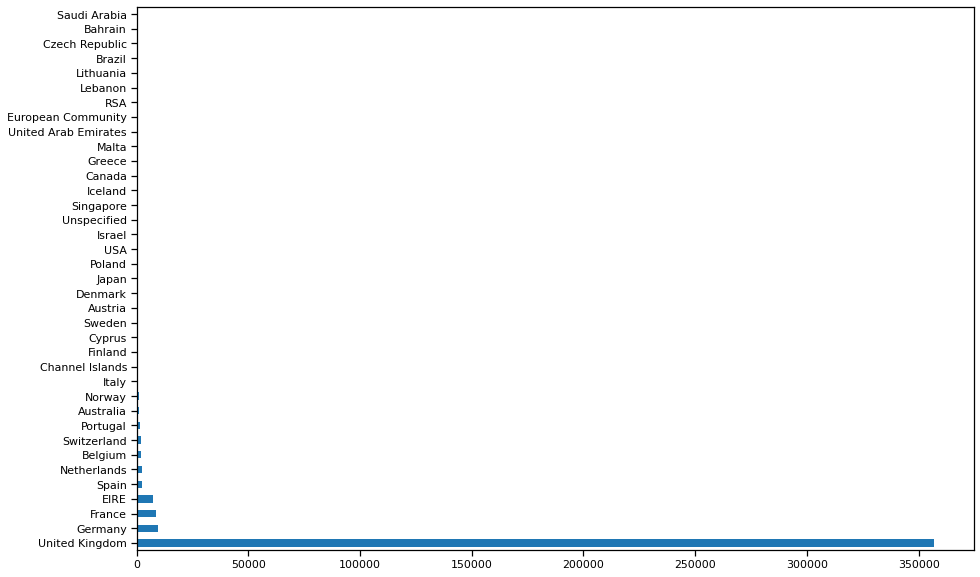

In [75]:
df['Country'].value_counts()[:37].plot(kind='barh',rot=0, figsize=(15, 10))

Most Customers Are From United Kibgdom

Customers and products

In [8]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


There are 4372 users who have bought 3684 products. The total number of transactions is 22190.

Drop the Invoice No. column as it is not needed For RMF Analysis.

In [9]:
#df.drop(['InvoiceNo'],axis='columns',inplace= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [11]:
df.describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


Counting Null Values

In [12]:
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

Removing Null ValuesView

In [13]:
df.dropna(subset=['Description','CustomerID'], how='all', inplace= True)

Removing the special characters from descritpion column

In [14]:
df.Description = df.Description.str.replace('\W+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Converting To Lower Case

In [15]:
df['Description']= df['Description'].str.lower()

Treating the negative quantities as 0 for RMF analysis

In [16]:
df['Quantity']= list(map((lambda x: 0 if(x<0) else x),df['Quantity']))

Feature Engineering

 Creating a new column called 'price' = Quantity Multiplied By Unitprice

In [17]:
df['Price']= df['Quantity'] * df['UnitPrice']

Looking at top 5 Dataset

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,whitehanginghearttlightholder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,whitemetallantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,creamcupidheartscoathanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knittedunionflaghotwaterbottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,redwoollyhottiewhiteheart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Creating new column called 'date' from Invoice Date

In [19]:
df['date'] = pd.to_datetime(df['InvoiceDate']).dt.date

Looking at top 5 data Set

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,date
0,536365,85123A,whitehanginghearttlightholder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,whitemetallantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,creamcupidheartscoathanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,knittedunionflaghotwaterbottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,redwoollyhottiewhiteheart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


Finding Range of date of Data

In [21]:
print(df['date'].min(), df['date'].max())

2010-12-01 2011-12-09


Setting the analysis date as 2012-01-01 and calculating the Recency

In [22]:
df['no_of_days']= (dt.date(2012,1,1))-df['date']

In [23]:
df['no_of_days']= df['no_of_days'].astype('timedelta64[D]')

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,date,no_of_days
0,536365,85123A,whitehanginghearttlightholder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,396.0
1,536365,71053,whitemetallantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,396.0
2,536365,84406B,creamcupidheartscoathanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,396.0
3,536365,84029G,knittedunionflaghotwaterbottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,396.0
4,536365,84029E,redwoollyhottiewhiteheart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,396.0


Finding RMF

In [25]:
rfm = df.groupby('CustomerID').agg({'no_of_days': lambda x:x.min(),'CustomerID': lambda x: len(x),'Price': lambda x: x.sum()})     
rfm.rename(columns={'no_of_days': 'recency', 'CustomerID': 'frequency', 'Price': 'monetary'}, inplace=True)

In [26]:
rfm.head() #REMOVE ID FROM INDEX

,recency,frequency,monetary
CustomerID,,,
12346,348.0,2,77183.60
12347,25.0,182,4310.00
12348,98.0,31,1797.24
12349,41.0,73,1757.55
12350,333.0,17,334.40


In [27]:
rfm.describe()

,recency,frequency,monetary
count,4372.000000,4372.000000,4372.000000
mean,114.581199,91.858188,2032.755923
std,100.772139,229.223566,8952.025481
min,23.000000,1.000000,0.000000
25%,39.000000,17.000000,302.175000
50%,73.000000,41.000000,659.435000
75%,166.000000,99.250000,1647.315000
max,396.000000,7812.000000,280206.020000


The scores are given as follows: for frequency and monetary 1 is the lowest and 4 the highest while for recency it is the opposite

Recency

In [28]:
rfm["recency_score"] = pd.cut(rfm["recency"], bins=[-1,np.percentile(rfm["recency"], 25),np.percentile(rfm["recency"], 50), 
                                             np.percentile(rfm["recency"], 75),rfm["recency"].max()],labels=[4, 3, 2, 1]).astype("int")

Frequency

In [29]:
rfm["frequency_score"] = pd.cut(rfm["frequency"], bins=[-1,np.percentile(rfm["frequency"], 25),np.percentile(rfm["frequency"], 50), 
                                             np.percentile(rfm["frequency"], 75),rfm["frequency"].max()],labels=[1, 2, 3, 4]).astype("int")

Monetary

In [30]:
rfm["monetary_score"] = pd.cut(rfm["monetary"], bins=[-1,np.percentile(rfm["monetary"], 25),np.percentile(rfm["monetary"], 50), 
                                             np.percentile(rfm["monetary"], 75),rfm["monetary"].max()],labels=[1, 2, 3, 4])

In [31]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346,348.0,2,77183.60,1,1,4
12347,25.0,182,4310.00,4,4,4
12348,98.0,31,1797.24,2,2,4
12349,41.0,73,1757.55,3,3,4
12350,333.0,17,334.40,1,1,2


Creating RFM class and Customer Segments

In [32]:
rfm['RFMClass']=0
rfm['Customer_Seg']=''

In [33]:
j=0
while j <= (len(rfm)-1):
    rfm['RFMClass'][j]= ((rfm['recency_score'].iloc[j])*100)+((rfm['frequency_score'].iloc[j])*10)+(rfm['monetary_score'].iloc[j])
    j+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Creating Table

In [34]:
from tabulate import tabulate

In [35]:
table= [['R','M','F1','F2','F3','F4'],['4','4','Unsteady','Active','Top customer','Top customer'],[' ','3','Unsteady','Active','Top customer','Top customer'],
       [' ','2','Unsteady','Active','Active','Active'],[' ','1','Unsteady','Active','Active','Active'],['3','4','Unsteady','Emerging','Emerging','Emerging'],
       [' ','3','Unsteady','Emerging','Emerging','Emerging'],[' ','2','Unsteady','Unsteady','Unsteady','Unsteady'],[' ','1','Unsteady','Unsteady','Unsteady','Unsteady'],
       ['2','4','At risk','At risk','At risk','At risk'],[' ',3,'At risk','At risk','At risk','At risk'],[' ','2','Potentially lost','Potentially lost','At risk','At risk'],
       [' ','2','Potentially lost','Potentially lost','At risk','At risk'],[' ','1','Potentially lost','Potentially lost','At risk','At risk'],
       ['1','4','Inactive','Inactive','At risk','At risk'],[' ','3','Inactive','Inactive','At risk','At risk'],[' ','2','Lost','Lost','At risk','At risk'],
       [' ','1','Lost','Lost','At risk','At risk']]
print('Customer Segmentation: ')
print(tabulate(table,headers='firstrow', tablefmt='fancy_grid'))

Customer Segmentation: 
╒═════╤═════╤══════════════════╤══════════════════╤══════════════╤══════════════╕
│ R   │   M │ F1               │ F2               │ F3           │ F4           │
╞═════╪═════╪══════════════════╪══════════════════╪══════════════╪══════════════╡
│ 4   │   4 │ Unsteady         │ Active           │ Top customer │ Top customer │
├─────┼─────┼──────────────────┼──────────────────┼──────────────┼──────────────┤
│     │   3 │ Unsteady         │ Active           │ Top customer │ Top customer │
├─────┼─────┼──────────────────┼──────────────────┼──────────────┼──────────────┤
│     │   2 │ Unsteady         │ Active           │ Active       │ Active       │
├─────┼─────┼──────────────────┼──────────────────┼──────────────┼──────────────┤
│     │   1 │ Unsteady         │ Active           │ Active       │ Active       │
├─────┼─────┼──────────────────┼──────────────────┼──────────────┼──────────────┤
│ 3   │   4 │ Unsteady         │ Emerging         │ Emerging     │ Emergin

In [36]:
k=0
while k <= (len(rfm)-1):
    if rfm['recency_score'].iloc[k]== 4 and rfm['frequency_score'].iloc[k]>=3 and  rfm['monetary_score'].iloc[k]>=3:
        rfm['Customer_Seg'].iloc[k]= 'Top Customers'
    elif rfm['recency_score'].iloc[k]== 4 and rfm['frequency_score'].iloc[k]>=1 and  rfm['monetary_score'].iloc[k]>=1:
        rfm['Customer_Seg'].iloc[k]= 'Active Customers'
    elif rfm['recency_score'].iloc[k]== 3 and rfm['frequency_score'].iloc[k]>=2 and  rfm['monetary_score'].iloc[k]>=3:
        rfm['Customer_Seg'].iloc[k]= 'Emerging Customers'
    elif rfm['recency_score'].iloc[k]>= 3 and rfm['frequency_score'].iloc[k]==1 and  rfm['monetary_score'].iloc[k]>=1:
        rfm['Customer_Seg'].iloc[k]= 'Unsteady Customers'
    elif rfm['recency_score'].iloc[k]== 3 and rfm['frequency_score'].iloc[k]>=2 and  rfm['monetary_score'].iloc[k]<=2:
        rfm['Customer_Seg'].iloc[k]= 'Unsteady Customers'
    elif rfm['recency_score'].iloc[k]== 2 and rfm['frequency_score'].iloc[k]>=1 and  rfm['monetary_score'].iloc[k]>=3:
        rfm['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm['recency_score'].iloc[k]== 2 and rfm['frequency_score'].iloc[k]>=3 and  rfm['monetary_score'].iloc[k]<=2:
        rfm['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm['recency_score'].iloc[k]== 1 and rfm['frequency_score'].iloc[k]>=3 and  rfm['monetary_score'].iloc[k]>=1:
        rfm['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm['recency_score'].iloc[k]== 2 and rfm['frequency_score'].iloc[k]<=2 and  rfm['monetary_score'].iloc[k]<=2:
        rfm['Customer_Seg'].iloc[k]= 'Potentially lost'
    elif rfm['recency_score'].iloc[k]== 1 and rfm['frequency_score'].iloc[k]<=2 and  rfm['monetary_score'].iloc[k]>=3:
        rfm['Customer_Seg'].iloc[k]= 'Inactive Customers'
    elif rfm['recency_score'].iloc[k]== 1 and rfm['frequency_score'].iloc[k]<=2 and  rfm['monetary_score'].iloc[k]<=2:
        rfm['Customer_Seg'].iloc[k]= 'Lost'
    else:
        rfm['Customer_Seg'].iloc[k]= 'Uncategorized'
    k+=1  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFMClass,Customer_Seg
CustomerID,,,,,,,,
12346,348.0,2,77183.60,1,1,4,114,Inactive Customers
12347,25.0,182,4310.00,4,4,4,444,Top Customers
12348,98.0,31,1797.24,2,2,4,224,At Risk
12349,41.0,73,1757.55,3,3,4,334,Emerging Customers
12350,333.0,17,334.40,1,1,2,112,Lost


In [38]:
data = rfm.groupby("Customer_Seg")["RFMClass"].count()
data

Customer_Seg
Active Customers      326
At Risk               800
Emerging Customers    623
Inactive Customers     73
Lost                  799
Potentially lost      477
Top Customers         770
Unsteady Customers    504
Name: RFMClass, dtype: int64

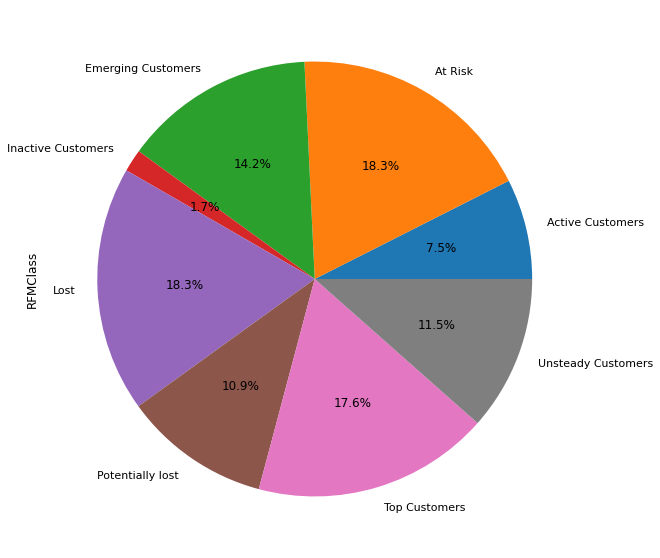

In [39]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(10,10))
data.plot.pie(autopct="%.1f%%")

Observation

A significant number of customers have been lost

[Text(0, 0.5, 'Sale'), Text(0.5, 0, 'Country')]

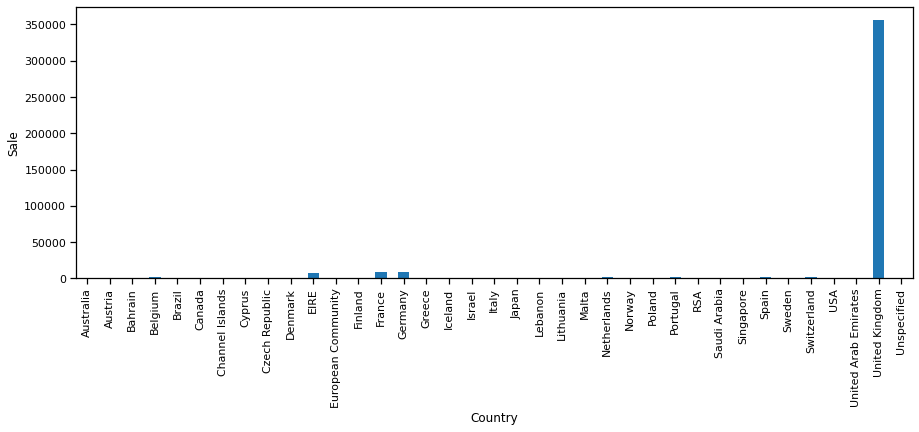

In [40]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(15,5))
a= df.groupby("Country")["Price"].size().plot(kind = "bar")
a.set(xlabel="Country", ylabel = "Sale")

Maximum number of transactions have taken place in UK

In [41]:
rfm['monetary_score']=rfm['monetary_score'].astype('int32')

Analyzing UK as they have most number of data

Creating New Data Frame Called 'uk'

In [42]:
uk= df[df['Country']=='United Kingdom']

In [43]:
rfm_uk = uk.groupby('CustomerID').agg({'no_of_days': lambda x:x.min(),'CustomerID': lambda x: len(x),'Price': lambda x: x.sum()})     
rfm_uk.rename(columns={'no_of_days': 'recency', 'CustomerID': 'frequency', 'Price': 'monetary'}, inplace=True)

In [44]:
rfm_uk.head()

,recency,frequency,monetary
CustomerID,,,
12346,348.0,2,77183.60
12747,25.0,103,4196.01
12748,23.0,4459,33053.19
12749,26.0,231,4090.88
12820,26.0,59,942.34


In [45]:
rfm_uk['monetary']= rfm_uk['monetary'].astype('int')

In [46]:
rfm_uk.describe()

,recency,frequency,monetary
count,3950.000000,3950.000000,3950.000000
mean,114.323038,90.310886,1843.825316
std,100.236848,216.804909,7451.912511
min,23.000000,1.000000,0.000000
25%,39.000000,17.000000,290.250000
50%,73.000000,41.000000,638.500000
75%,166.000000,99.000000,1560.750000
max,396.000000,7812.000000,259657.000000


In [47]:
rfm_uk["recency_score"] = pd.cut(rfm_uk["recency"], bins=[-1,np.percentile(rfm_uk["recency"], 25),np.percentile(rfm_uk["recency"], 50), 
                                             np.percentile(rfm_uk["recency"], 75),rfm_uk["recency"].max()],labels=[4, 3, 2, 1]).astype("int")

In [48]:
rfm_uk["frequency_score"] = pd.cut(rfm_uk["frequency"], bins=[-1,np.percentile(rfm_uk["frequency"], 25),np.percentile(rfm_uk["frequency"], 50), 
                                             np.percentile(rfm_uk["frequency"], 75),rfm_uk["frequency"].max()],labels=[1, 2, 3, 4]).astype("int")

In [49]:
rfm_uk["monetary_score"] = pd.cut(rfm_uk["monetary"], bins=[-1,np.percentile(rfm_uk["monetary"], 25),np.percentile(rfm_uk["monetary"], 50), 
                                             np.percentile(rfm_uk["monetary"], 75),rfm_uk["monetary"].max()],labels=[1, 2, 3, 4])

In [50]:
rfm_uk

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346,348.0,2,77183,1,1,4
12747,25.0,103,4196,4,4,4
12748,23.0,4459,33053,4,4,4
12749,26.0,231,4090,4,4,4
12820,26.0,59,942,4,3,3
...,...,...,...,...,...,...
18280,300.0,10,180,1,1,1
18281,203.0,7,80,1,1,1
18282,30.0,13,178,4,1,1


In [51]:
rfm_uk['RFMClass']=0
rfm_uk['Customer_Seg']=''

In [52]:
j=0
while j <= (len(rfm_uk)-1):
    rfm_uk['RFMClass'][j]= ((rfm_uk['recency_score'].iloc[j])*100)+((rfm_uk['frequency_score'].iloc[j])*10)+(rfm_uk['monetary_score'].iloc[j])
    j+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
k=0
while k <= (len(rfm_uk)-1):
    if rfm_uk['recency_score'].iloc[k]== 4 and rfm_uk['frequency_score'].iloc[k]>=3 and  rfm_uk['monetary_score'].iloc[k]>=3:
        rfm_uk['Customer_Seg'].iloc[k]= 'Top Customers'
    elif rfm_uk['recency_score'].iloc[k]== 4 and rfm_uk['frequency_score'].iloc[k]>=1 and  rfm_uk['monetary_score'].iloc[k]>=1:
        rfm_uk['Customer_Seg'].iloc[k]= 'Active Customers'
    elif rfm_uk['recency_score'].iloc[k]== 3 and rfm_uk['frequency_score'].iloc[k]>=2 and  rfm_uk['monetary_score'].iloc[k]>=3:
        rfm_uk['Customer_Seg'].iloc[k]= 'Emerging Customers'
    elif rfm_uk['recency_score'].iloc[k]>= 3 and rfm_uk['frequency_score'].iloc[k]==1 and  rfm_uk['monetary_score'].iloc[k]>=1:
        rfm_uk['Customer_Seg'].iloc[k]= 'Unsteady Customers'
    elif rfm_uk['recency_score'].iloc[k]== 3 and rfm_uk['frequency_score'].iloc[k]>=2 and  rfm_uk['monetary_score'].iloc[k]<=2:
        rfm_uk['Customer_Seg'].iloc[k]= 'Unsteady Customers'
    elif rfm_uk['recency_score'].iloc[k]== 2 and rfm_uk['frequency_score'].iloc[k]>=1 and  rfm_uk['monetary_score'].iloc[k]>=3:
        rfm_uk['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm_uk['recency_score'].iloc[k]== 2 and rfm_uk['frequency_score'].iloc[k]>=3 and  rfm_uk['monetary_score'].iloc[k]<=2:
        rfm_uk['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm_uk['recency_score'].iloc[k]== 1 and rfm_uk['frequency_score'].iloc[k]>=3 and  rfm_uk['monetary_score'].iloc[k]>=1:
        rfm_uk['Customer_Seg'].iloc[k]= 'At Risk'
    elif rfm_uk['recency_score'].iloc[k]== 2 and rfm_uk['frequency_score'].iloc[k]<=2 and  rfm_uk['monetary_score'].iloc[k]<=2:
        rfm_uk['Customer_Seg'].iloc[k]= 'Potentially lost'
    elif rfm_uk['recency_score'].iloc[k]== 1 and rfm_uk['frequency_score'].iloc[k]<=2 and  rfm_uk['monetary_score'].iloc[k]>=3:
        rfm_uk['Customer_Seg'].iloc[k]= 'Inactive Customers'
    elif rfm_uk['recency_score'].iloc[k]== 1 and rfm_uk['frequency_score'].iloc[k]<=2 and  rfm_uk['monetary_score'].iloc[k]<=2:
        rfm_uk['Customer_Seg'].iloc[k]= 'Lost'
    else:
        rfm_uk['Customer_Seg'].iloc[k]= 'Uncategorized'
    k+=1       

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
rfm_uk['monetary_score']=rfm_uk['monetary_score'].astype('int32')

In [55]:
rfm_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3950 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          3950 non-null   float64
 1   frequency        3950 non-null   int64  
 2   monetary         3950 non-null   int64  
 3   recency_score    3950 non-null   int64  
 4   frequency_score  3950 non-null   int64  
 5   monetary_score   3950 non-null   int32  
 6   RFMClass         3950 non-null   int64  
 7   Customer_Seg     3950 non-null   object 
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 391.3+ KB


In [56]:
data1 = rfm_uk.groupby("Customer_Seg")["RFMClass"].count()
data1

Customer_Seg
Active Customers      294
At Risk               716
Emerging Customers    573
Inactive Customers     67
Lost                  725
Potentially lost      429
Top Customers         695
Unsteady Customers    451
Name: RFMClass, dtype: int64

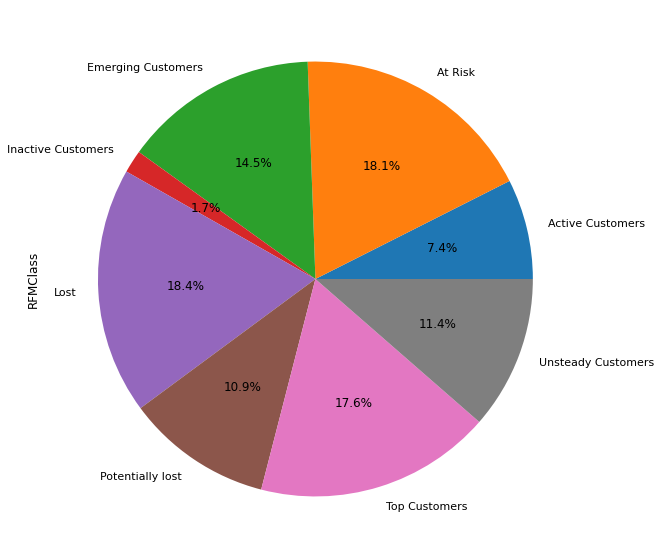

In [57]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(10,10))
data1.plot.pie(autopct="%.1f%%")

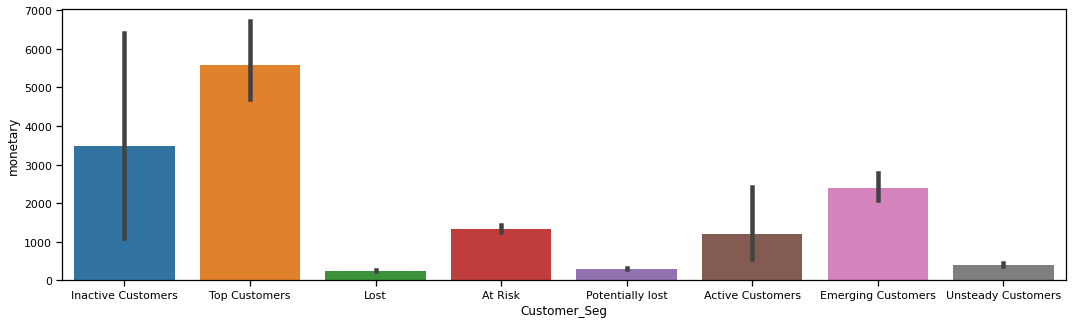

In [58]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(18,5))
sns.barplot(y='monetary',x= 'Customer_Seg',data= rfm_uk)

RFM framework is a method used to determine customer value by looking at the following three dimensions:¶
Recency: when is the last time the user takes an action (e.g., login, place an order)?
Frequency: how many times does the user take this action?
Monetary value: what is the sum of monetary value from this user throughout his/her lifetime?
When used properly, RFM becomes a powerful tool to identify the most valuable customer (MVC) of a business. Based on the output from this model, we are able to develop customized CRM strategies for different customer segments